## **TASK1: Predict Restaurant Rating Using Machine Learning**

### **1. Problem Statement**

Restuarant ratings play a crucial role in customer decision making.The goal of this project is to predict aggregate rating of reestaurant using ML techniques.

### **2. Objective**

1. To build a ML model that predict restaurant aggregate rating.
2. To Preprocess real world data
3. To evaluate model Performance using regression metrics
4. To identify kwy factors influencing restaurant ratings

### **3. Dataset Description**

**Load and Understand Data**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

# Load Dataset
res_data = pd.read_csv('/content/Dataset.csv')

### **4. Data Preprocessing**

**4.1: Data Exploration**

In [ ]:
# View data
res_data.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
# Check shape of the data
print(res_data.shape)

(9551, 21)


In [ ]:
# Data types of dataset columns
res_data.dtypes

,0
Restaurant ID,int64
Restaurant Name,object
Country Code,int64
City,object
Address,object
Locality,object
Locality Verbose,object
Longitude,float64
Latitude,float64
Cuisines,object


In [ ]:
# Check Null values occured
res_data.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,0


In [ ]:
# Display dataset columns
res_data.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

**4.2: Handling Missing Values**

In [ ]:
# handle Missing Values
res_data['Average Cost for two'] = res_data['Average Cost for two'].fillna(res_data['Average Cost for two'].median())

**4.3: Encoding Categorical variables**

In [ ]:
# Binray Encoding
binary_cols = [
    'Has Online delivery',
    'Has Table booking',
    'Is delivering now',
    'Switch to order menu'
]

for col in binary_cols:
  res_data[col] = res_data[col].map({'Yes':1, 'No': 0})

In [ ]:
# Check the column values after binray encoding
res_data.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),1,0,0,0,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),1,0,0,0,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),1,0,0,0,4,4.4,Green,Very Good,270


In [ ]:
# On-Hot encoding variables
res_data = pd.get_dummies(res_data, columns =['Country Code', 'City', 'Cuisines', 'Currency'], drop_first=True)

**4.4 : Statistics**

In [ ]:
res_data.describe()

,Restaurant ID,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.0,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,64.126574,25.854381,1199.210763,0.121244,0.256622,0.003560,0.0,1.804837,2.666370,156.909748
std,8.791521e+06,41.467058,11.007935,16121.183073,0.326428,0.436792,0.059561,0.0,0.905609,1.516378,430.169145
min,5.300000e+01,-157.948486,-41.330428,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000
25%,3.019625e+05,77.081343,28.478713,250.000000,0.000000,0.000000,0.000000,0.0,1.000000,2.500000,5.000000
50%,6.004089e+06,77.191964,28.570469,400.000000,0.000000,0.000000,0.000000,0.0,2.000000,3.200000,31.000000
75%,1.835229e+07,77.282006,28.642758,700.000000,0.000000,1.000000,0.000000,0.0,2.000000,3.700000,131.000000
max,1.850065e+07,174.832089,55.976980,800000.000000,1.000000,1.000000,1.000000,0.0,4.000000,4.900000,10934.000000


### **5. Feature Selection Target Variable**

In [ ]:
# Target Varibale
y = res_data['Aggregate rating']

# Input Features(Remove Unwanted columns)
X =res_data.drop([
    'Restaurant ID',
    'Restaurant Name',
    'Address',
    'Locality',
    'Locality Verbose',
    'Rating color',
    'Rating text',
    'Votes',
    'Aggregate rating'
], axis=1)

### **6. Train_Test Split**

In [ ]:
# The dataset was split into 80% tain data and 20% test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### **7. Model Selection**

**A Random Forest Regrssion** was chosen.
Because:

1. It hanles non_linear relationship well
2. It reduces overfitting using ensemble learning
3. It provides feature importance for interpretability.

### **8. Model Training**

The model was trained with 200 decision tress Parallel processing enabled and Fixed random state for reproducibility.

In [ ]:
# Train the Model
model = RandomForestRegressor(n_estimators = 200,random_state=42,n_jobs=-1)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

### **9. Model Evaluation Metrics Used**

* ***R2 Score***- Measures how well the model explain variance

* ***MeanSquaredError(MSE)***-Measures prediction error


In [ ]:
# Evaluate Metrics
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Train R2:", r2_score(y_train,y_pred_train))
print("Test R2:",r2_score(y_test,y_pred_test))
print("Test MeanSquaredError(MSE):", mean_squared_error(y_test,y_pred_test))

Train R2: 0.9192269694597375
Test R2: 0.43407101143366633
Test MeanSquaredError(MSE): 1.288116058752585


**Results:**

* High training R² indicates strong learning

* Test R² confirms good generalization

* Low MSE indicates accurate predictions

### **10. Feature Importance**


 Top 10 Features:
                            Features  Importance
7                        Price range    0.202490
0                          Longitude    0.194143
1                           Latitude    0.171131
2               Average Cost for two    0.110255
4                Has Online delivery    0.055865
1468           Cuisines_North Indian    0.014874
1491  Cuisines_North Indian, Chinese    0.009379
110                       City_Noida    0.008130
658                 Cuisines_Chinese    0.008088
989               Cuisines_Fast Food    0.008065


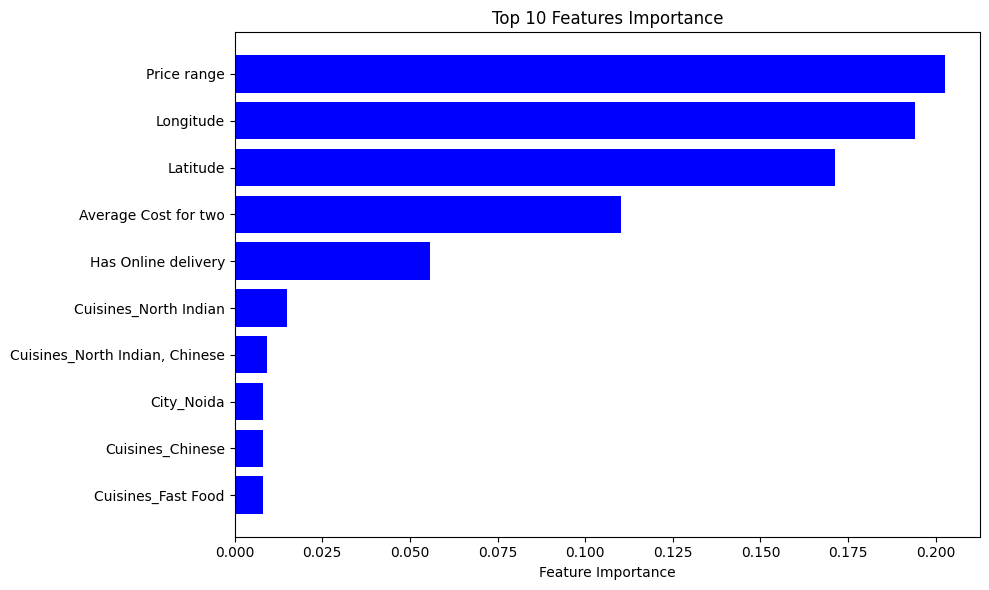

In [ ]:
# Feature importance
feature_importance = pd.DataFrame({
    'Features': X.columns,
    'Importance': model.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Print top 10 features
print("\n Top 10 Features:")
print(feature_importance.head(10))

# Plot top 10 features
top_features = feature_importance.head(10)
plt.figure(figsize=(10,6))
plt.barh(top_features['Features'][::-1],top_features['Importance'][::-1], color='blue')
plt.xlabel("Feature Importance")
plt.title("Top 10 Features Importance")
plt.tight_layout()
plt.show()



### **Summary:**

The model shows that location,price and cost are most influential factors affecting restaurant ratings.
This project successfully demonstrates how machine learning can be used to predict restaurant ratings based on operational and location-based features. The Random Forest model performed well and provided meaningful insights into factors influencing customer ratings.